# Gradient Descent I: Differentiation
### <i>in Python with Sympy</i>

<i>Patrick White</i></br>
<i>Dec 03, 2024</i>

<img src="img/gd1.png" style="height: 450px; width:auto;">

# Outline

- Derivatives
- Differentiability
- Finding Derivative Functions with Sympy
- Second-Order Derivatives
- Partial Derivatives
- What’s Next?

# Derivatives

Neural networks and gradient-based machine learning optimization techniques make heavy use of the concepts of derivatives and partial derivatives. The derivative of a function represents the rate of change of that function. Common notations include:

- $f'(x)$

- $\frac{df}{dx}$

- $\frac{d}{dx}$

- $\dot{f}(x)$

A function for which the output is constant such as $f(x)=2$ has a derivative of $0$ at all points, because the output never changes. A linear function like $f(x)=3x$ has a constant derivative (in this case, $3$), because $f(x)$ increases by that constant for each unit of $x$. The below illustrates using Python.

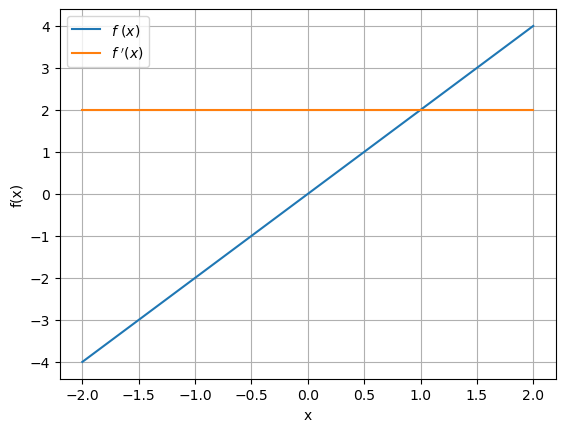

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def fx(x):
    return 2*x

def deriv(x):
    return np.repeat(2,len(x))

x = np.linspace(-2,2,1001)
y = fx(x)
dy = deriv(x)

plt.plot(x,y)
plt.plot(x,dy)
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(['$f ~(x)$','$f ~\'(x)$'])
plt.show();

Below is a parabolic function, $f(x) = x^2$, which shows a linearly increasing derivative, because for each unit of increase in $x$ (whether below or above zero), not only does $f(x)$ increase, but so does its rate of change, by a constant amount represented by the constant in the exponent. 

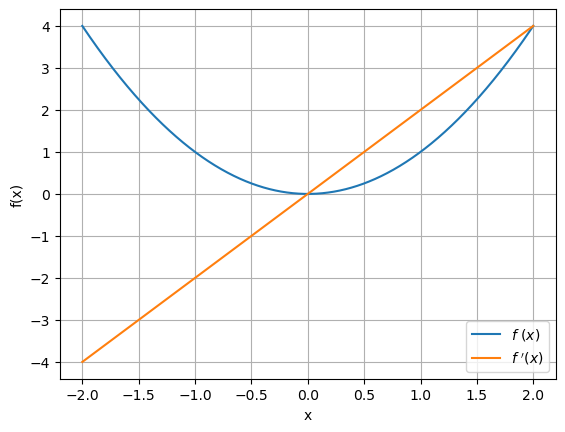

In [3]:
def fx(x):
    return x**2

def deriv(x):
    return 2*x

x = np.linspace(-2,2,1001)
y = fx(x)
dy = deriv(x)

plt.plot(x,y)
plt.plot(x,dy)
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(['$f ~(x)$','$f ~\'(x)$'])
plt.show();

Below $x=0$, the derivative is negative, because $f(x)$ is decreasing, but despite being negative, it is constantly increasing, because the rate of change in $f(x)$ is becoming less negative.

# Differentiability

Continuous functions are differentiable, however not all functions are continuous. For example, because $f(x)=1/x$ is undefined at $x=0$, so is its derivative.

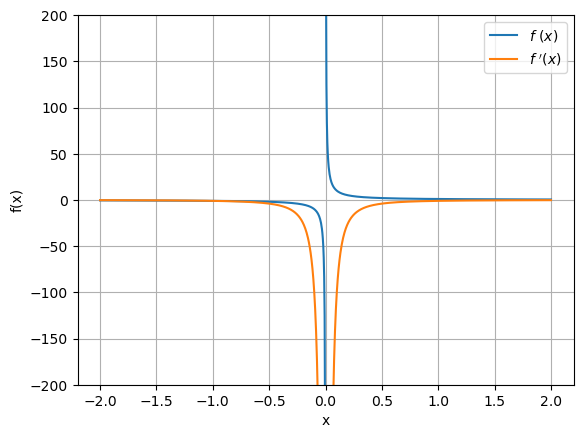

In [4]:
import warnings
warnings.filterwarnings('ignore') 

x = np.linspace(-2,2,1001)
y = 1/x
dy = -1/x**2

plt.plot(x,y)
plt.plot(x,dy)
plt.grid()
plt.ylim(-200,200)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(['$f ~(x)$','$f ~\'(x)$'])
plt.show();

A function is not completely differentiable if:

- It is not defined at a point.
- It does not have a limit at that point.
- The function is not continuous.

Various rules exist to help us quickly and analytically determine the derivatives of various types of functions. For example, the power rule tells us the following:

$\text{given } f(x) = xn, ~f(x)  = x^n$

In other words, to get the derivative from a power function, we bring the exponent down in front of the x variable, and leave an exponent that has been reduced by 1. There are many more differentiation rules, I have linked <a href="https://en.wikipedia.org/wiki/Differentiation_rules">here</a> to the Wikipedia page.

# Finding Derivative Functions with Sympy

Thankfully, software can automate the symbolic differentiation of functions where differentiable. The main such library in Python is Sympy. We’ll start with a quick check of the assertion that the derivative of $x^2$ is $2x$.

In [5]:
import sympy as sym
from sympy.abc import x

fx = (x**2)
dx = sym.diff(fx)

print('expression is ', fx)
print('derivative is ', dx)

expression is  x**2
derivative is  2*x


Commonly used with composite functions, particularly in packages such as Tensorflow, is automatic differentiation, which solves analytically using the chain rule of calculus, a method for breaking the derivative of a function into a series of simpler ones, relating the derivatives of each intermediate variable.

$\frac{dy}{dx}=\frac{dy}{du}⋅\frac{du}{dx}$

# Second-Order Derivatives

Sometimes, we are interested in a second-order derivative, which is simply the derivative of the first derivative of a function. Some forms of notation include:

- $f''(x)$

- $\frac{d^2f}{dx^2}$

- $\frac{\partial^2 f}{\partial x^2}$

- $\ddot{f}(t)$

A common example to illustrate is that while the first derivative of a car’s position measures speed, the second-derivative of the car’s position is acceleration. 

Geometrically, by describing how the rate of change is changing, the second derivative tells us about the curvature of the function. For a ‘critical point’, where the first derivative is equal to zero, $f’’(x)$ is greater than $0$ at a local minimum, and less than $0$ at a local maximum. If the second derivative at a critical point is equal to zero,  we can seek additional information from higher-level derivatives, but for polynomial functions, a number of differentiations equal to or greater than the degree of the polynomial will leave us with an uninformative derivative function which is constantly $0$. Consider the following example, using the power rule discussed earlier:

- $f(x) = x^3$
- $f'(x) = 3x^2$
- $f''(x) = 6x$
- $f'''(x) = 6$
- $f''''(x) = 0$

Let’s confirm using Sympy.

In [6]:
fx = x**3

dx = sym.diff(fx)
d2x = sym.diff(dx)
d3x = sym.diff(d2x)
d4x = sym.diff(d3x)

print('expression is   ', fx)
print('first deriv is  ', dx)
print('second deriv is ', d2x)
print('third deriv is  ', d3x)
print('fourth deriv is ', d4x)

expression is    x**3
first deriv is   3*x**2
second deriv is  6*x
third deriv is   6
fourth deriv is  0


And plot the function with its first and second derivative.

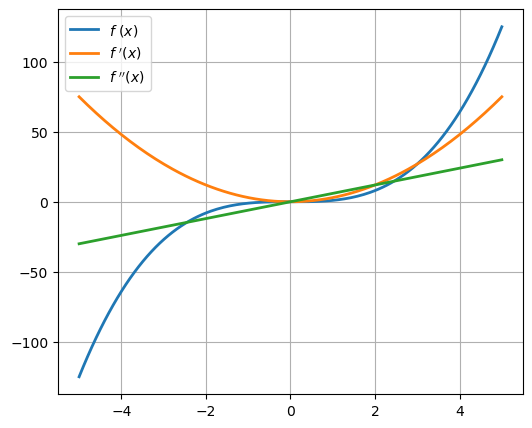

In [7]:
xx = np.linspace(-5,5,200)

fxx = sym.simplify(fx)
dx = sym.diff(fx)
d2x = sym.diff(dx)

fxx = sym.lambdify(x, fxx)
dx = sym.lambdify(x, dx)
d2x = sym.lambdify(x, d2x)

fig, ax = plt.subplots()
fig.set_size_inches(6,5)

ax.plot(xx,fxx(xx), linewidth=2, label='$f ~(x)$')
ax.plot(xx,dx(xx), linewidth=2, label='$f ~\'(x)$')
ax.plot(xx,d2x(xx), linewidth=2, label='$f ~\' \'(x)$')
    
ax.grid()
ax.legend(loc='upper left');

# Partial Derivatives

For multivariate functions, we have the concept of partial derivatives. For example, to express how the function $f(x,y)$ changes with respect to $x$, we write the term $\frac{\partial f}{\partial x}$.

The function $f(x,y) = x^2 + x^3$ has two partial derivatives:

$\frac{\partial f}{\partial x} = 2x$

$\frac{\partial f}{\partial y} = 3y^2$

Let’s confirm using Sympy.

In [8]:
from sympy.abc import x, y
fx = x**2 + y**3
dxx = sym.diff(fx, x)
dyy = sym.diff(fx, y)
print('Partial derivative of', fx)
print('is ', dxx)
print('')
print('Partial derivative of', fx)
print('is ', dyy)

Partial derivative of x**2 + y**3
is  2*x

Partial derivative of x**2 + y**3
is  3*y**2


The collection of partial derivatives for a multivariate function is a vector of values called the gradient, denoted as $\nabla f$. For our two-variable function it could be denoted as $\nabla f(x,y)$. This provides information about which direction to step toward during optimization processes.

In [9]:
print("gradient at (3,1) is ({},{})".format(dxx.subs([(x,1),(y,1)]), dyy.subs([(x,1),(y,1)])))

print("gradient at (1,2) is ({},{})".format(dxx.subs([(x,2),(y,1)]),  dyy.subs([(x,2),(y,1)])))

gradient at (3,1) is (2,3)
gradient at (1,2) is (4,3)


The matrix representing all partial derivatives of a function whose input and output are vectors, as with the hidden-layer units in a neural network, is called a Jacobian matrix.

$\mathbf{J}_{i,j} = \frac{\partial f_i}{\partial x_j}$

The matrix containing all second-order partial derivatives of the same function is known as a Hessian matrix.

$\mathbf{H}(f)_{i,j} = \frac{\partial^2 f}{\partial x_i \partial x_j}$

# What’s Next?

That concludes this first article, but part II will come shortly, and will discuss the gradient descent process, and its variants and parameters. 

# References

- Brownlee, J. (2021). Optimization for Machine Learning (A. Tam, Ed.) (1st ed.). MachineLearningMastery. https://machinelearningmastery.com/optimization-for-machine-learning/

- Cristina, S., Saeed, M., & Tam, A. (2022). Calculus for Machine Learning (1st ed.). MachineLearningMastery. https://machinelearningmastery.com/calculus-for-machine-learning/

- Cohen, M. X. (2024). Master calculus 1 using Python: Derivatives and applications [Online Video]. Udemy. https://www.udemy.com/course/pycalc1_x

- Cohen, M. X. (2024). A deep understanding of deep learning [Online Video]. Udemy. https://www.udemy.com/course/deeplearning_x

- Goodfellow, I., Bengio, Y., & Courville, A. (2016). Deep Learning. MIT Press.  https://www.deeplearningbook.org/